# installation and imports

In [1]:
!pip install scipy==1.7.3
!pip install Fitter
!pip install sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn import preprocessing
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
from tqdm import tqdm
from scipy.stats import ks_2samp


# Load Data

we connect our dirve and get our dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path='/content/drive/MyDrive/DateSecience/NFLX.csv'

in the Experiment part we try those 4 datasets source:

1.   https://www.kaggle.com/jainilcoder/netflix-stock-price-prediction

2.   https://www.kaggle.com/datasets/camnugent/california-housing-prices

3.   https://www.kaggle.com/code/aeryan/spotify-music-analysis/data

4.   https://www.kaggle.com/datasets/abcsds/pokemon






first, we read the dataset with panda's library and create list of the columns names - 10 first row present.

In [5]:
data_csv = pd.read_csv(path)
data = data_csv.copy()
row_count, column_count = data_csv.shape
table_cols_name = data_csv.columns
data_csv.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


# remove values random from csv

secondly we removing 5% of each features **randomaly** and replacing it with Nan. 

In [6]:
dataset_len = len(data_csv)
five_percent = int((dataset_len * 5) / 100)
for j in range(len(data_csv.columns)):
  for i in range (five_percent):
    row = random.randint(0, row_count-1)
    data_csv.loc[row,table_cols_name[j]] = np.nan
data_csv.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,NaN
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900.0
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200.0
7,2018-02-14,260.470001,269.880005,260.329987,NaN,266.000000,10972000.0
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700.0
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400.0


# Methods for Imputation of missing values


in this part we trying different imuting methods: 


*   Statistic methods: mean, median, most frequence, zero value, and covariance 
*   Machine learning methods: knn algorithm



imputing missing values by mean

In [7]:
data_with_mean_values= data_csv.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in table_cols_name:
  if isinstance(data_with_mean_values[i][0], str):
    continue
  data_with_mean_values[i] = imputer.fit_transform(data_with_mean_values[i].values.reshape(-1,1))
data_with_mean_values.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,7.544475e+06
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,1.259580e+07
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8.981500e+06
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9.306700e+06
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,1.690690e+07
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8.534900e+06
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6.855200e+06
7,2018-02-14,260.470001,269.880005,260.329987,418.928447,266.000000,1.097200e+07
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,1.075970e+07
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8.312400e+06


impute missing values by median

In [8]:
data_with_median_values = data_csv.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for i in table_cols_name:
  if isinstance(data_with_median_values[i][0], str):
    continue
  data_with_median_values[i] = imputer.fit_transform(data_with_median_values[i].values.reshape(-1,1))
data_with_median_values.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,5931500.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900.0
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200.0
7,2018-02-14,260.470001,269.880005,260.329987,377.875000,266.000000,10972000.0
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700.0
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400.0


imputing missing values by most frequent

In [9]:
data_with_most_frequent_value = data_csv.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in table_cols_name:
  if isinstance(data_with_most_frequent_value[i][0], str):
    continue
  data_with_most_frequent_value[i] = imputer.fit_transform(data_with_most_frequent_value[i].values.reshape(-1,1))
data_with_most_frequent_value.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,3732200.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900.0
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200.0
7,2018-02-14,260.470001,269.880005,260.329987,357.320007,266.000000,10972000.0
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700.0
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400.0


imputig missing values by zero value

In [10]:
data_with_zero_value = data_csv.copy()
imputer = SimpleImputer(missing_values=np.nan,fill_value=0, strategy='constant')
for i in table_cols_name:
  if isinstance(data_with_zero_value[i][0], str):
    continue
  data_with_zero_value[i] = imputer.fit_transform(data_with_zero_value[i].values.reshape(-1,1))
data_with_zero_value.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,0.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900.0
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200.0
7,2018-02-14,260.470001,269.880005,260.329987,0.000000,266.000000,10972000.0
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700.0
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400.0


imputing missing values by using knn

In [11]:
data_with_numric_column = data_csv.copy()
le = preprocessing.LabelEncoder()
catgory_column_list = data_with_numric_column.select_dtypes(include=['object']).columns.tolist()
for column in catgory_column_list:
      data_with_numric_column[column] = le.fit_transform(data_with_numric_column[column])
data_with_knn_value = data_with_numric_column
impute_knn = KNNImputer(n_neighbors=2)
data_with_knn_value = pd.DataFrame(impute_knn.fit_transform(data_with_knn_value), columns=data_with_knn_value.columns)
data_with_knn_value.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,0.0,262.000000,267.899994,250.029999,254.259995,254.259995,8080950.0
1,1.0,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2.0,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,3.0,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,4.0,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0
5,5.0,252.139999,259.149994,249.000000,257.950012,257.950012,8534900.0
6,6.0,257.290009,261.410004,254.699997,258.269989,258.269989,6855200.0
7,7.0,260.470001,269.880005,260.329987,271.599998,266.000000,10972000.0
8,8.0,270.029999,280.500000,267.630005,280.269989,280.269989,10759700.0
9,9.0,278.730011,281.959991,275.690002,278.519989,278.519989,8312400.0


inputig missing values by covariance

In [12]:
data_with_corr_value = data_with_numric_column
impute_it = IterativeImputer()
data_with_corr_value = pd.DataFrame(impute_it.fit_transform(data_with_corr_value), columns=data_with_corr_value.columns)
data_with_corr_value.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,0.0,262.000000,267.899994,250.029999,254.259995,254.259995,1.442937e+07
1,1.0,247.699997,266.700012,245.000000,265.720001,265.720001,1.259580e+07
2,2.0,266.579987,272.450012,264.329987,264.559998,264.559998,8.981500e+06
3,3.0,267.079987,267.619995,250.000000,250.100006,250.100006,9.306700e+06
4,4.0,253.850006,255.800003,236.110001,249.470001,249.470001,1.690690e+07
5,5.0,252.139999,259.149994,249.000000,257.950012,257.950012,8.534900e+06
6,6.0,257.290009,261.410004,254.699997,258.269989,258.269989,6.855200e+06
7,7.0,260.470001,269.880005,260.329987,266.000000,266.000000,1.097200e+07
8,8.0,270.029999,280.500000,267.630005,280.269989,280.269989,1.075970e+07
9,9.0,278.730011,281.959991,275.690002,278.519989,278.519989,8.312400e+06


# Ploting the datasets

In [13]:
datasets =[data, data_csv, data_with_mean_values, data_with_median_values, data_with_most_frequent_value, data_with_knn_value, data_with_zero_value]
datasets_names = ['data', 'data_csv', 'data_with_mean_values', 'data_with_median_values', 'data_with_most_frequent_value', 'data_with_knn_value', 'data_with_zero_value']

here we can see one col - "open" of housing dataset ploting before and after each imputing. we can see the the zero values create a lot of outliners, the mean add a lot values between 370 and 450. most frqeuence make 320-370 col higher, knn is Relatively similar to the original data.

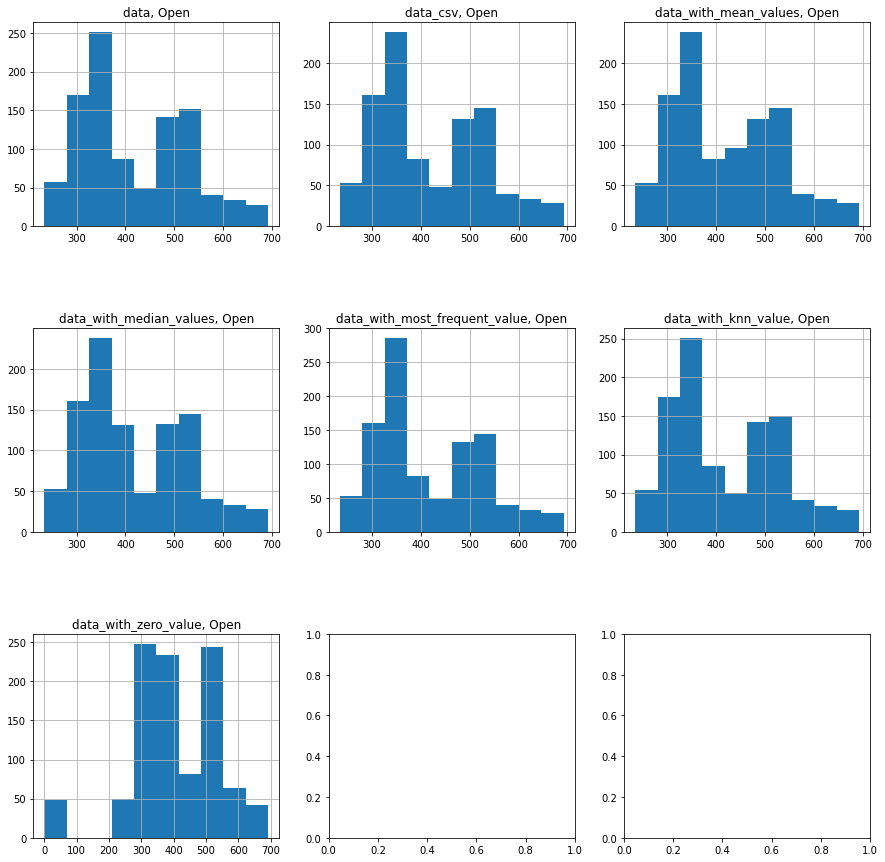

In [14]:
n=len(datasets)
cols = 3
rows=(n//3) + 1 if n%3 !=0 else 0
#max_bars = 8

#generate a figures grid:
fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)
for i, dataset in enumerate(datasets):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols
    
    dataset[table_cols_name[1]].hist(ax=axes[r,c])
    axes[r,c].set_title(datasets_names[i] + ', ' + table_cols_name[1])

# find the best method

In this part we want our code to find the best method for the imputation. we are trying 4 statistical methods In order to decide which method is the best - each method return the best dataset to imputiation, we take the imputation method the was most frequence between the four statical method. the statistic methods:


*   distribution by sum squere error
*   ks test
*   skewness
*   kurtosis





distribution by sum squere error: 

the distribution of feature in the new dataset checked by Fitter liabry, we calculating the best distribution by sum square error and return the list with each feature distribution and the original data distribution

In [15]:
def best_fit_dest(column_name):
  data_best_dest = ''
  same_dist_summary = []
  for i, dataset in enumerate(datasets):
    if datasets_names[i] == 'data_csv':
      continue
    try:
      f = Fitter(dataset[column_name].values, distributions=get_common_distributions())
      f.fit()
      d = f.summary()

      best_dist = f.get_best(method='sumsquare_error')
      if datasets_names[i] == 'data':
          data_best_dest = {'best': best_dist, 'd': d}
          continue

      if next(iter(best_dist)) == next(iter(data_best_dest['best'])):
        same_dist_summary.append([datasets_names[i], d])
    except:
        pass
  return same_dist_summary, data_best_dest

we calculate which dataset return the most close sum sqeure error to the original data.

In [16]:
def mme(same_dist_summary, data_best_dest):
  col = next(iter(data_best_dest['best']))
  best_mme = data_best_dest['d'].loc[col, 'sumsquare_error']
  first = 0
  for i, dist in enumerate(same_dist_summary):
    x = dist[1].loc[col, 'sumsquare_error']
    if i == 0:
      first = abs(x-best_mme)
      best = dist

    closet = abs(x-best_mme)

    if closet < first:
      first = closet
      best = dist
  return best


In [17]:
def chose_best_data(col):
  same_dist_summary, data_best_dest = best_fit_dest(col) 
  if len(same_dist_summary) == 0:
    return ''
  elif len(same_dist_summary) == 1:
    return same_dist_summary[0][0]
  else:
    return mme(same_dist_summary, data_best_dest)[0]



KS test:

KS test is used to decide if a sample comes from a population with a specific distribution. we using this test to check if the new data distribution is as the original data distribution

In [18]:
def ks_test(col):
    max_pvalue = 0
    best_dataset = ''
    for i, dataset in enumerate(datasets):
      if datasets_names[i] == 'data_csv' or datasets_names[i] == 'data':
        continue
      try:
        res,pval = ks_2samp(data[col], dataset[col])
        if pval > max_pvalue:
          max_pvalue = pval
          best_dataset = datasets_names[i]
      except:
        pass
    return best_dataset
  

Skewness:

Skeness refers to an asymmetry that deviates from the normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. we want to check the original skewness and the new skewness and return the data with the similar skewness to the original.

In [19]:
def skewness(col):
  first = 0
  try:
    data_skewness = data[col].skew()
  except:
    return ''
  for i, dataset in enumerate(datasets):
    if datasets_names[i] == 'data_csv' or datasets_names[i] == 'data':
      continue      
    x = dataset[col].skew()
    if i == 2:
      first = abs(x-data_skewness)
      best_data = datasets_names[i] 
      # best_skew = x
    closet = abs(x-data_skewness)
    if closet < first:
      first = closet
      best_data = datasets_names[i] 
    # best_skew = x

  return best_data

kurtosis:

Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. we want to check the original kurtosis and the new kurtosis and return the data with the similar kurtosis to the original.

In [20]:
def kurtosis(col):
  first = 0
  try:
    data_kurt = data[col].kurt()
  except:
    return ''
  for i, dataset in enumerate(datasets):
    if datasets_names[i] == 'data_csv' or datasets_names[i] == 'data':
      continue      
    x = dataset[col].kurt()
    if i == 2:
      first = abs(x-data_kurt)
      best_data = datasets_names[i] 
    closet = abs(x-data_kurt)
    if closet < first:
      first = closet
      best_data = datasets_names[i] 

  return best_data

data_with_knn_value


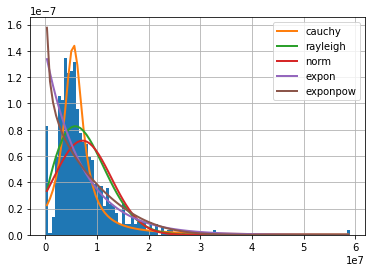

In [21]:
best_by_ks_test = []
best_by_dist = []
best_by_skewness = []
best_by_kurtosis = []

for col in table_cols_name:
        best_by_dist.append(chose_best_data(col))
        best_by_ks_test.append(ks_test(col))
        best_by_skewness.append(skewness(col))
        best_by_kurtosis.append(kurtosis(col))

best = []
best.append(max(set(best_by_skewness), key=best_by_skewness.count))
best.append(max(set(best_by_kurtosis), key=best_by_kurtosis.count))
best.append(max(set(best_by_dist), key=best_by_dist.count))
best.append(max(set(best_by_ks_test), key=best_by_ks_test.count))

print(max(set(best), key=best.count))